In [1]:
!pip install yellowbrick
#Import the necesary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import dotenv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")




data = pd.read_csv(r"C:\Users\basil\OneDrive\Escritorio\Ironhack\labs\DB-recomender.csv")
data

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Don't Change,INXS,0.206,0.810,9,-6.492,1,0.0423,0.000059,0.064400,0.0855,0.155,163.552,audio_features,2j7z87EnqB1NFQts2db0VR,spotify:track:2j7z87EnqB1NFQts2db0VR,https://api.spotify.com/v1/tracks/2j7z87EnqB1N...,https://api.spotify.com/v1/audio-analysis/2j7z...,268200,4
1,Halo,Beyoncé,0.508,0.720,11,-5.908,0,0.0628,0.272000,0.000000,0.0563,0.472,79.983,audio_features,4JehYebiI9JE8sR8MisGVb,spotify:track:4JehYebiI9JE8sR8MisGVb,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,https://api.spotify.com/v1/audio-analysis/4Jeh...,261640,4
2,It's My Life,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.026300,0.000013,0.3470,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,224493,4
3,Where Did Our Love Go,The Supremes,0.566,0.490,0,-10.867,1,0.0414,0.791000,0.000014,0.0919,0.847,134.934,audio_features,69RH84na5iUNwrwxpgjC5j,spotify:track:69RH84na5iUNwrwxpgjC5j,https://api.spotify.com/v1/tracks/69RH84na5iUN...,https://api.spotify.com/v1/audio-analysis/69RH...,153333,4
4,Ordinary World,Duran Duran,0.472,0.652,1,-10.171,0,0.0305,0.013100,0.000011,0.1400,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,340200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Work It,Missy Elliott,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,audio_features,3jagJCUbdqhDSPuxP8cAqF,spotify:track:3jagJCUbdqhDSPuxP8cAqF,https://api.spotify.com/v1/tracks/3jagJCUbdqhD...,https://api.spotify.com/v1/audio-analysis/3jag...,263227,4
1008,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
1009,Never Gonna Not Dance Again,P!nk,0.668,0.802,5,-4.005,0,0.0917,0.027300,0.000000,0.1630,0.769,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4
1010,TRUSTFALL,P!nk,0.636,0.888,8,-3.889,1,0.0945,0.001620,0.000216,0.1470,0.250,122.032,audio_features,4FWbsd91QSvgr1dSWwW51e,spotify:track:4FWbsd91QSvgr1dSWwW51e,https://api.spotify.com/v1/tracks/4FWbsd91QSvg...,https://api.spotify.com/v1/audio-analysis/4FWb...,237200,4


In [2]:
# Selecciona solo las columnas numéricas para escalar
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Escala los datos
scaler = StandardScaler()
X_prep = scaler.fit_transform(data[numeric_columns])


In [3]:
# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajusta el modelo KMeans a los datos escalados
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=42)

In [4]:
# predecir |  asignar clusters:
clusters = kmeans.predict(X_prep)
clusters

array([2, 4, 4, ..., 4, 2, 2])

In [5]:
# ver el tamaño de los clusters
pd.Series(clusters).value_counts().sort_index()

0     31
1    160
2    269
3    349
4    203
Name: count, dtype: int64

In [6]:
# Explore the cluster assignment in the original dataset
X_df = data
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Don't Change,INXS,0.206,0.810,9,-6.492,1,0.0423,0.000059,0.064400,...,0.155,163.552,audio_features,2j7z87EnqB1NFQts2db0VR,spotify:track:2j7z87EnqB1NFQts2db0VR,https://api.spotify.com/v1/tracks/2j7z87EnqB1N...,https://api.spotify.com/v1/audio-analysis/2j7z...,268200,4,1
1,Halo,Beyoncé,0.508,0.720,11,-5.908,0,0.0628,0.272000,0.000000,...,0.472,79.983,audio_features,4JehYebiI9JE8sR8MisGVb,spotify:track:4JehYebiI9JE8sR8MisGVb,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,https://api.spotify.com/v1/audio-analysis/4Jeh...,261640,4,2
2,It's My Life,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.026300,0.000013,...,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,224493,4,2
3,Where Did Our Love Go,The Supremes,0.566,0.490,0,-10.867,1,0.0414,0.791000,0.000014,...,0.847,134.934,audio_features,69RH84na5iUNwrwxpgjC5j,spotify:track:69RH84na5iUNwrwxpgjC5j,https://api.spotify.com/v1/tracks/69RH84na5iUN...,https://api.spotify.com/v1/audio-analysis/69RH...,153333,4,0
4,Ordinary World,Duran Duran,0.472,0.652,1,-10.171,0,0.0305,0.013100,0.000011,...,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,340200,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Work It,Missy Elliott,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,...,0.584,101.868,audio_features,3jagJCUbdqhDSPuxP8cAqF,spotify:track:3jagJCUbdqhDSPuxP8cAqF,https://api.spotify.com/v1/tracks/3jagJCUbdqhD...,https://api.spotify.com/v1/audio-analysis/3jag...,263227,4,2
1008,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,...,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,2
1009,Never Gonna Not Dance Again,P!nk,0.668,0.802,5,-4.005,0,0.0917,0.027300,0.000000,...,0.769,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4,2
1010,TRUSTFALL,P!nk,0.636,0.888,8,-3.889,1,0.0945,0.001620,0.000216,...,0.250,122.032,audio_features,4FWbsd91QSvgr1dSWwW51e,spotify:track:4FWbsd91QSvgr1dSWwW51e,https://api.spotify.com/v1/tracks/4FWbsd91QSvg...,https://api.spotify.com/v1/audio-analysis/4FWb...,237200,4,1


In [7]:
kmeans.inertia_

9495.25232009174

In [8]:
import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[11629.898321531808,
 10768.468682960467,
 10001.089400702966,
 9339.007824291337,
 8726.617473669881,
 8251.651184093675,
 7764.306152770285,
 7399.8469612641375,
 7117.890803873681,
 6865.808565685409,
 6613.608398011412,
 6550.3236736241815,
 6350.183786947338,
 6187.999444856807,
 6051.782324526427,
 5952.342202919961,
 5862.604019431582,
 5741.328182172427]

In [9]:
# "performance metric"
kmeans.inertia_

5741.328182172427

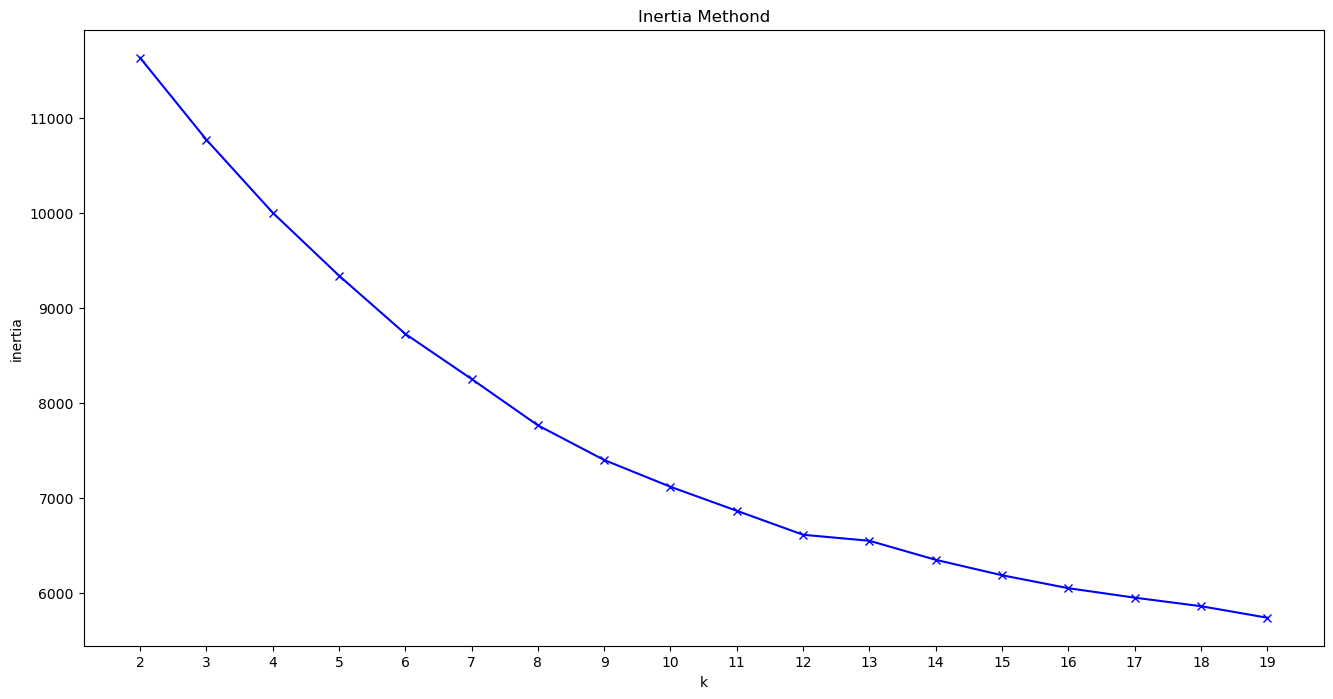

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.title('Inertia Methond')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [11]:
#Checking the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)

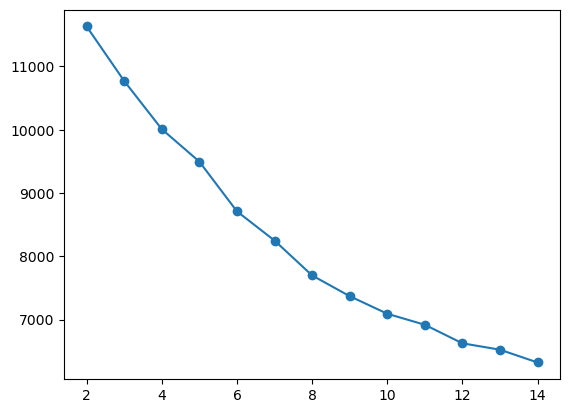

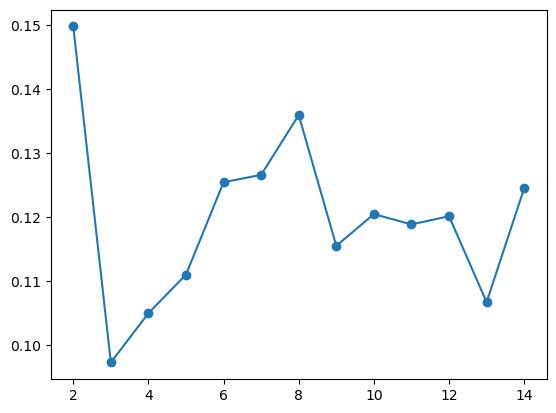

In [12]:
inertia = []
silhouette_scores = []
ranges = range(2,15)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_prep)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(ranges,inertia, marker = "o")
plt.show()

plt.plot(ranges, silhouette_scores, marker="o")

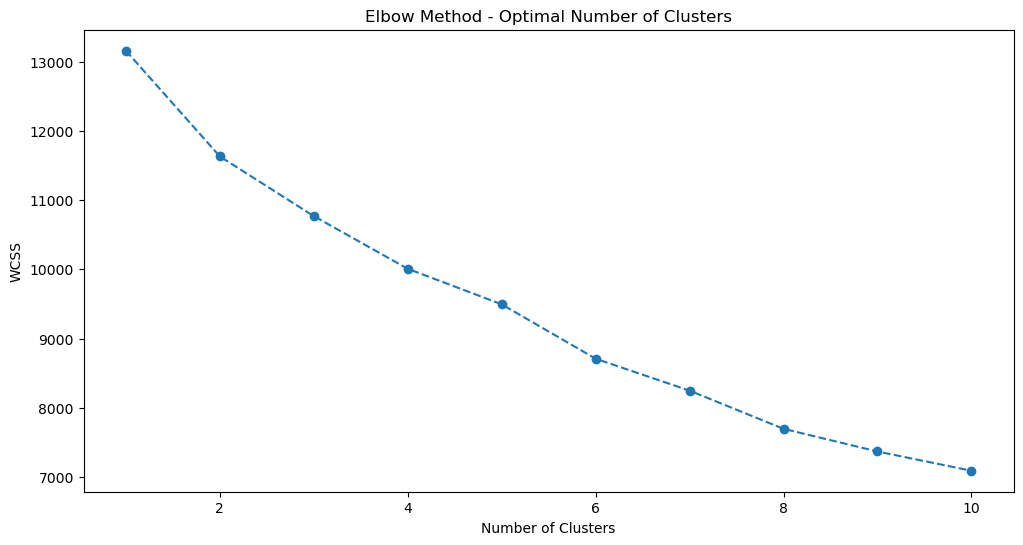

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.show()

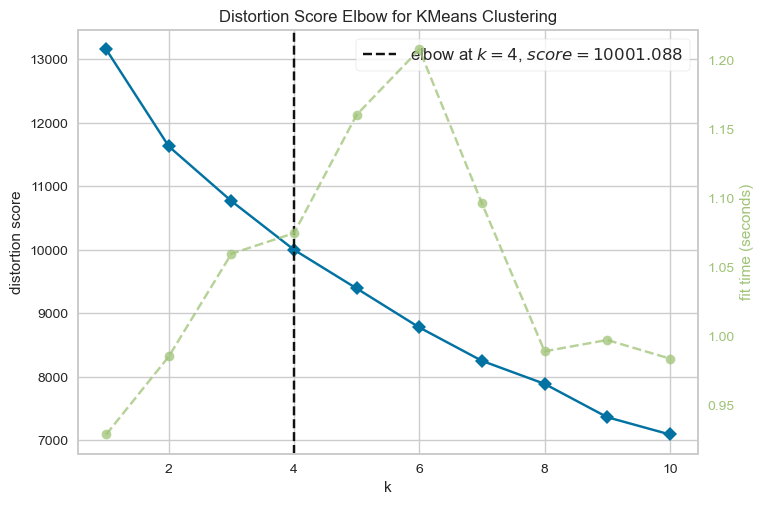

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already defined and scaled your 'cluster_data', if not, make sure you do that.

model = KMeans(n_clusters=3)  # You can change the number of clusters as needed
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_prep)
visualizer.show()

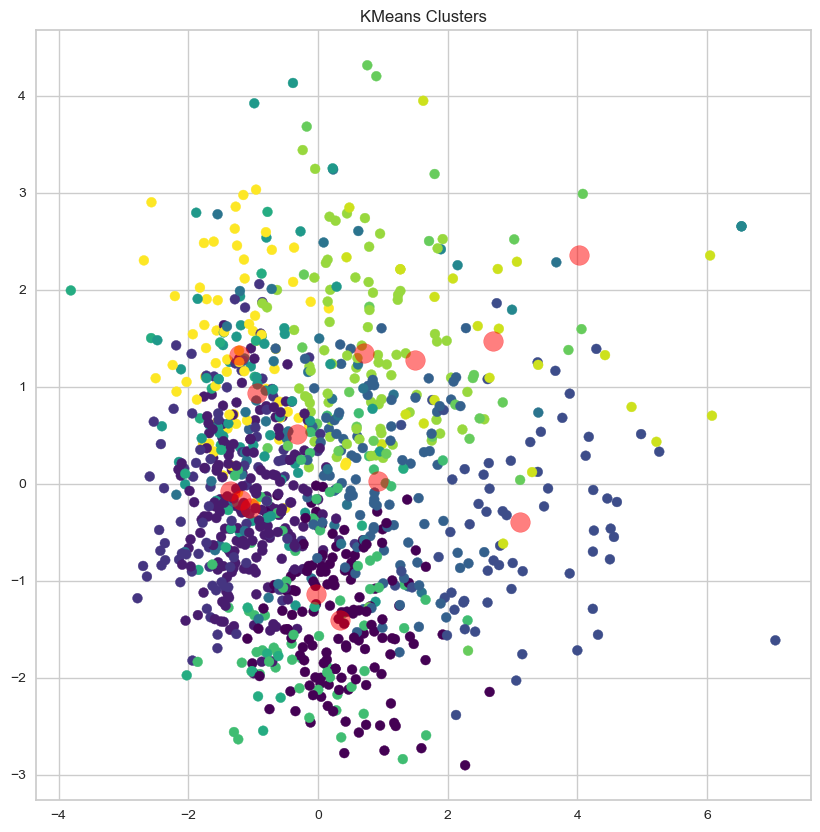

In [15]:
#Plotting the clusters and its centroids
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_prep)
pca_centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clusters')
plt.show()

In [16]:
#Trying to cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X_prep)
data['cluster_dbscan'] = dbscan.labels_

data['cluster_dbscan'].value_counts()

cluster_dbscan
-1    996
 0      2
 1      2
 2      2
 3      2
 4      2
 5      2
 6      2
 7      2
Name: count, dtype: int64

In [28]:

#Trying to cluster the data using Gaussian Mixture
gmm = GaussianMixture(n_components=5)
gmm.fit(X_prep)
data['cluster_gmm'] = gmm.predict(X_prep)

data['cluster_gmm'].value_counts()

cluster_gmm
0    476
1    246
4    244
3     34
2     12
Name: count, dtype: int64

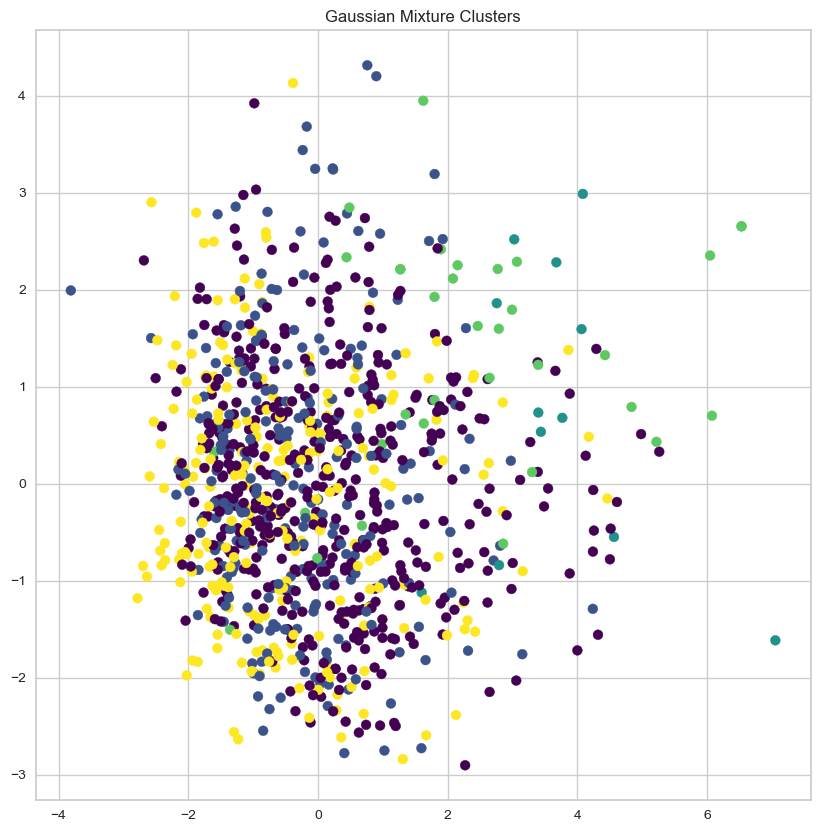

In [29]:
#Plotting the clusters and its centroids
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm.predict(X_prep), s=50, cmap='viridis')
plt.title('Gaussian Mixture Clusters')
plt.show()

In [ ]:
#KMeans Clusters is the best model 

In [23]:
#Creating a function to search for a song in the dataframe and return the cluster
def get_cluster(song):
    try:
        return data[data['song'] == song]['cluster'].values[0]
    except:
        return None

In [25]:
#Testing the function
get_cluster('Anti-Hero')

2